# Exploratory Data Analysis of Numerical Columns

We will have a brief evaluation on the integrated dataset of COE Indonesia. The exploratory data analysis in this section will only focus on the numerical columns, we will have a swift observation on them.

## Data Loading and Adjustments.

In [100]:
import pandas as pd

# Define the folder path
data_path = "/home/er_bim/Indonesia_COE/data/processed/cleaned/"

# Load the data
df = pd.read_csv(data_path + 'coe_indonesia.csv', index_col=0)

There are some split lot in the dataset, a coffee lot that is offered as two different lots.

Because the lot is split, their rank is being twinned, and other features such as production weight, price, total value, and buyer are different from that lot.

Let's check those data.

In [101]:
twin_rank = df[df['Rank'].str.contains('A|B', case=False, na=False)]
twin_rank

,Year,Rank,Score,Farm,Farmer,Region,Process,Variety_1,Variety_2,Variety_3,Variety_4,Weight (Lbs),High Bid (US$),Total Value (US$),Buyer
26,2022,1A,90.59,Koperasi Ribang Gayo Musara,Bahagia Ginting,Aceh,Natural,Ateng,P-88,NaN,NaN,429.90,40.20,17281.9800,Sulalat Coffee Trading
27,2022,1B,90.59,Koperasi Ribang Gayo Musara,Bahagia Ginting,Aceh,Natural,Ateng,P-88,NaN,NaN,396.83,40.20,15952.5660,"Coffee Beyond Borders for Uminomuko Coffee, Xtrat"
49,2023,1A,91.41,Ijen Lestari,Dandy Dharmawan,Jawa Timur,Carbonic Maceration Natural,USDA 762,Kartika,NaN,NaN,396.83,45.50,18055.7650,"Orsir International Co., Ltd."
50,2023,1B,91.41,Ijen Lestari,Dandy Dharmawan,Jawa Timur,Carbonic Maceration Natural,USDA 762,Kartika,NaN,NaN,391.19,43.60,17055.8840,SAVAYA Coffee Market – USA WAVY Coffee Roaster...
51,2023,2A,90.35,Wajamala,Marselina Walu,NTT,Dry Hulled,S-795,Typica,NaN,NaN,330.69,30.00,9920.7000,"Coffee Me Up (Korea), Slick Coffee Co., Coffee..."
52,2023,2B,90.35,Wajamala,Marselina Walu,NTT,Dry Hulled,S-795,Typica,NaN,NaN,295.11,30.50,9000.8550,"BIG BLACK BOX (Thailand), Casa Lapin, Koff&Bun..."
53,2023,3A,90.06,Angin-angin,Yolan Tirta,Sulawesi Selatan,Honey,Lini S-795,NaN,NaN,NaN,298.51,26.25,7835.8875,"BLACK GOLD COFFEE (TAIWAN), COFFEE PARTNER INT..."
54,2023,3B,90.06,Angin-angin,Yolan Tirta,Sulawesi Selatan,Honey,Lini S-795,NaN,NaN,NaN,264.55,27.30,7222.2150,CHG（手多多咖啡）


The split lots are indicated from the identical columns "Year", "Rank", "Score", and all of the categorical columns except "Buyer".

### Basic and Descriptive EDA.

In [102]:
# display the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# display column names, to get an idea of what data is available.
print(f"Column names in the dataset:\n{df.columns}\n")

# data types
print(f"The numerical columns are: \n{df.select_dtypes(include='number').columns.tolist()}\n")

# check the null value occurrence
print(f"The null value occurrence in each column are: \n{df.select_dtypes(include='number').isnull().sum()}")


The dataset contains 74 rows and 15 columns.

Column names in the dataset:
Index(['Year', 'Rank', 'Score', 'Farm', 'Farmer', 'Region', 'Process',
       'Variety_1', 'Variety_2', 'Variety_3', 'Variety_4', 'Weight (Lbs)',
       'High Bid (US$)', 'Total Value (US$)', 'Buyer'],
      dtype='object')

The numerical columns are: 
['Year', 'Score', 'Weight (Lbs)', 'High Bid (US$)', 'Total Value (US$)']

The null value occurrence in each column are: 
Year                 0
Score                0
Weight (Lbs)         0
High Bid (US$)       0
Total Value (US$)    0
dtype: int64


### Twin Rank Handling.

Because the lot is split, their rank is being twinned, and other features such as production weight, price, total value, and buyer are different from that lot.

Let's check those data.

In [103]:
twin = df[df['Rank'].str.contains('A|B', na=False)]
twin[["Year", "Rank", "Score", "Farm", "Farmer", "Weight (Lbs)", "High Bid (US$)", "Total Value (US$)", "Buyer"]]

,Year,Rank,Score,Farm,Farmer,Weight (Lbs),High Bid (US$),Total Value (US$),Buyer
26,2022,1A,90.59,Koperasi Ribang Gayo Musara,Bahagia Ginting,429.90,40.20,17281.9800,Sulalat Coffee Trading
27,2022,1B,90.59,Koperasi Ribang Gayo Musara,Bahagia Ginting,396.83,40.20,15952.5660,"Coffee Beyond Borders for Uminomuko Coffee, Xtrat"
49,2023,1A,91.41,Ijen Lestari,Dandy Dharmawan,396.83,45.50,18055.7650,"Orsir International Co., Ltd."
50,2023,1B,91.41,Ijen Lestari,Dandy Dharmawan,391.19,43.60,17055.8840,SAVAYA Coffee Market – USA WAVY Coffee Roaster...
51,2023,2A,90.35,Wajamala,Marselina Walu,330.69,30.00,9920.7000,"Coffee Me Up (Korea), Slick Coffee Co., Coffee..."
52,2023,2B,90.35,Wajamala,Marselina Walu,295.11,30.50,9000.8550,"BIG BLACK BOX (Thailand), Casa Lapin, Koff&Bun..."
53,2023,3A,90.06,Angin-angin,Yolan Tirta,298.51,26.25,7835.8875,"BLACK GOLD COFFEE (TAIWAN), COFFEE PARTNER INT..."
54,2023,3B,90.06,Angin-angin,Yolan Tirta,264.55,27.30,7222.2150,CHG（手多多咖啡）


First, we need to add a new column, to eliminate the alphabet character in the column "Rank".

In [104]:
# Define a function to convert ranks
def convert_rank(rank):
    if pd.isnull(rank):
        return rank
    if 'A' in rank or 'B' in rank:
        return int(rank[0])
    return int(rank)

# Apply the function to convert ranks
df['Converted Rank'] = df['Rank'].apply(convert_rank)

Now we set a new variable for the dataset and define the split lots.

In [105]:
# Set a new variable for the dataset
df_no_twin_rank = df

# Define the split lots
rank1_22 = df[(df['Converted Rank'] == 1) & (df['Year'] == 2022)]
rank1_23 = df[(df['Converted Rank'] == 1) & (df['Year'] == 2023)]
rank2_23 = df[(df['Converted Rank'] == 2) & (df['Year'] == 2023)]
rank3_23 = df[(df['Converted Rank'] == 3) & (df['Year'] == 2023)]

There are four columns that need to be handled:
1. "Weight (Lbs)" will be summarized the total value.
2. "High Bid (US$)" will be averaged the mean value.
3. "Total Value (US$)" will be summarized the total value.
4. "Buyer" will be combined the values.

In [106]:
# Group the twin rank data in year 2023 and the columns
twin_ranks = [rank1_22, rank1_23, rank2_23, rank3_23]

# Handle the twin data in year 2023
for r in twin_ranks:
    index = r.index.tolist()
    rank_A = index[0]
    rank_B = index[1]
    
    df_no_twin_rank['Weight (Lbs)'][rank_A] = r['Weight (Lbs)'].sum()
    df_no_twin_rank['High Bid (US$)'][rank_A] = r['High Bid (US$)'].mean()
    df_no_twin_rank['Total Value (US$)'][rank_A] = r['Total Value (US$)'].sum()
    df_no_twin_rank['Buyer'][rank_A] = df_no_twin_rank['Buyer'][rank_A] + ',' + df_no_twin_rank['Buyer'][rank_B]
    df_no_twin_rank = df_no_twin_rank.drop(rank_B)
    
    
df_no_twin_rank = df_no_twin_rank.reset_index(drop=True)
df_no_twin_rank['Total Value (US$)'] = df_no_twin_rank['Total Value (US$)'].round(2)
df_no_twin_rank['Year'] = df_no_twin_rank['Year'].astype(str)
df_no_twin_rank['Converted Rank'] = df_no_twin_rank['Converted Rank'].astype(str)
    

/tmp/ipykernel_16789/3782051026.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_twin_rank['Weight (Lbs)'][rank_A] = r['Weight (Lbs)'].sum()
/tmp/ipykernel_16789/3782051026.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_twin_rank['High Bid (US$)'][rank_A] = r['High Bid (US$)'].mean()
/tmp/ipykernel_16789/3782051026.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_twin_rank['Total Value (US$)'][rank_A] = 

In [107]:
df_no_twin_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70 non-null     object 
 1   Rank               70 non-null     object 
 2   Score              70 non-null     float64
 3   Farm               70 non-null     object 
 4   Farmer             70 non-null     object 
 5   Region             70 non-null     object 
 6   Process            70 non-null     object 
 7   Variety_1          70 non-null     object 
 8   Variety_2          55 non-null     object 
 9   Variety_3          28 non-null     object 
 10  Variety_4          8 non-null      object 
 11  Weight (Lbs)       70 non-null     float64
 12  High Bid (US$)     70 non-null     float64
 13  Total Value (US$)  70 non-null     float64
 14  Buyer              70 non-null     object 
 15  Converted Rank     70 non-null     object 
dtypes: float64(4), object(12)
me

Let's compare the data before and after the conversion.

The original data, still contain the tied rank.

In [108]:
df[df['Rank'].str.contains('A|B', case=False, na=False)]

,Year,Rank,Score,Farm,Farmer,Region,Process,Variety_1,Variety_2,Variety_3,Variety_4,Weight (Lbs),High Bid (US$),Total Value (US$),Buyer,Converted Rank
26,2022,1A,90.59,Koperasi Ribang Gayo Musara,Bahagia Ginting,Aceh,Natural,Ateng,P-88,NaN,NaN,826.73,40.20,33234.5460,"Sulalat Coffee Trading,Coffee Beyond Borders f...",1
27,2022,1B,90.59,Koperasi Ribang Gayo Musara,Bahagia Ginting,Aceh,Natural,Ateng,P-88,NaN,NaN,396.83,40.20,15952.5660,"Coffee Beyond Borders for Uminomuko Coffee, Xtrat",1
49,2023,1A,91.41,Ijen Lestari,Dandy Dharmawan,Jawa Timur,Carbonic Maceration Natural,USDA 762,Kartika,NaN,NaN,396.83,45.50,18055.7650,"Orsir International Co., Ltd.",1
50,2023,1B,91.41,Ijen Lestari,Dandy Dharmawan,Jawa Timur,Carbonic Maceration Natural,USDA 762,Kartika,NaN,NaN,391.19,43.60,17055.8840,SAVAYA Coffee Market – USA WAVY Coffee Roaster...,1
51,2023,2A,90.35,Wajamala,Marselina Walu,NTT,Dry Hulled,S-795,Typica,NaN,NaN,330.69,30.00,9920.7000,"Coffee Me Up (Korea), Slick Coffee Co., Coffee...",2
52,2023,2B,90.35,Wajamala,Marselina Walu,NTT,Dry Hulled,S-795,Typica,NaN,NaN,295.11,30.50,9000.8550,"BIG BLACK BOX (Thailand), Casa Lapin, Koff&Bun...",2
53,2023,3A,90.06,Angin-angin,Yolan Tirta,Sulawesi Selatan,Honey,Lini S-795,NaN,NaN,NaN,298.51,26.25,7835.8875,"BLACK GOLD COFFEE (TAIWAN), COFFEE PARTNER INT...",3
54,2023,3B,90.06,Angin-angin,Yolan Tirta,Sulawesi Selatan,Honey,Lini S-795,NaN,NaN,NaN,264.55,27.30,7222.2150,CHG（手多多咖啡）,3


The data after the tied rank handling.

In [109]:
df_no_twin_rank[df_no_twin_rank['Rank'].str.contains('A|B', case=False, na=False)]

,Year,Rank,Score,Farm,Farmer,Region,Process,Variety_1,Variety_2,Variety_3,Variety_4,Weight (Lbs),High Bid (US$),Total Value (US$),Buyer,Converted Rank
26,2022,1A,90.59,Koperasi Ribang Gayo Musara,Bahagia Ginting,Aceh,Natural,Ateng,P-88,NaN,NaN,826.73,40.200,33234.55,"Sulalat Coffee Trading,Coffee Beyond Borders f...",1
48,2023,1A,91.41,Ijen Lestari,Dandy Dharmawan,Jawa Timur,Carbonic Maceration Natural,USDA 762,Kartika,NaN,NaN,788.02,44.550,35111.65,"Orsir International Co., Ltd.,SAVAYA Coffee Ma...",1
49,2023,2A,90.35,Wajamala,Marselina Walu,NTT,Dry Hulled,S-795,Typica,NaN,NaN,625.80,30.250,18921.56,"Coffee Me Up (Korea), Slick Coffee Co., Coffee...",2
50,2023,3A,90.06,Angin-angin,Yolan Tirta,Sulawesi Selatan,Honey,Lini S-795,NaN,NaN,NaN,563.06,26.775,15058.10,"BLACK GOLD COFFEE (TAIWAN), COFFEE PARTNER INT...",3


### Comprehensive Statistical Summary.

In [110]:
print("Summary statistics for numerical columns:")
df_no_twin_rank.describe().round(2)

Summary statistics for numerical columns:


,Score,Weight (Lbs),High Bid (US$),Total Value (US$)
count,70.00,70.00,70.00,70.00
mean,88.21,593.61,20.08,11379.87
std,0.95,146.50,13.89,7623.17
min,87.06,346.13,6.25,4878.95
25%,87.59,466.28,10.75,6670.95
50%,87.92,572.74,17.90,9365.09
75%,88.73,624.71,22.90,11753.24
max,91.41,1058.20,80.00,39912.85


## Score

In [111]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

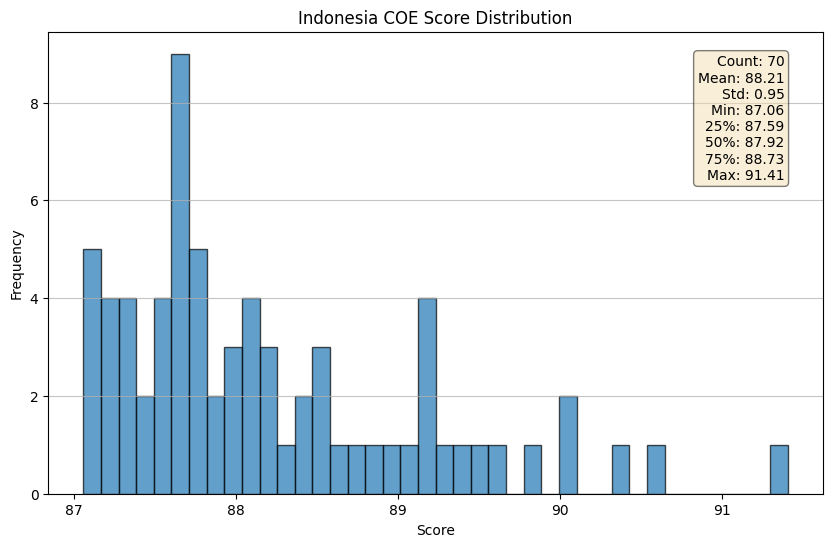

In [112]:
plt.figure(figsize=(10, 6))
plt.hist(df_no_twin_rank['Score'], bins=40, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Indonesia COE Score Distribution')
plt.grid(axis='y', alpha=0.75)

# Create the statistical summary note
stats = df_no_twin_rank['Score'].describe().round(2)

textstr = '\n'.join((
    f'Count: {stats["count"]:.0f}',
    f'Mean: {stats["mean"]:.2f}',
    f'Std: {stats["std"]:.2f}',
    f'Min: {stats["min"]:.2f}',
    f'25%: {stats["25%"]:.2f}',
    f'50%: {stats["50%"]:.2f}',
    f'75%: {stats["75%"]:.2f}',
    f'Max: {stats["max"]:.2f}'
))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.show()

             Frequency  Distribution (%)
Score Group                             
87-88               37             52.86
88-90               28             40.00
>90                  5              7.14


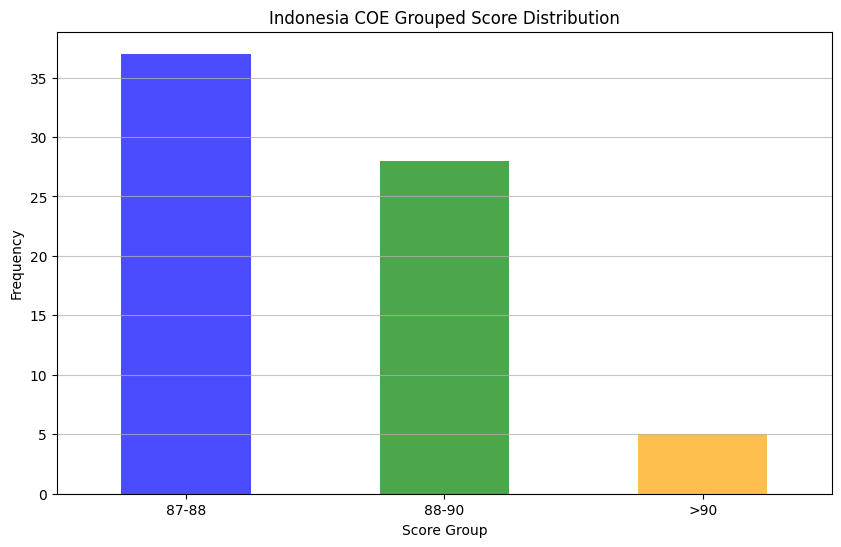

In [113]:
# Define the score categories
bins = [87, 87.99, 90, float('inf')]
labels = ['87-88', '88-90', '>90']

# Categorize the scores into the defined bins
df_no_twin_rank['Score Group'] = pd.cut(df_no_twin_rank['Score'], bins=bins, labels=labels, right=False)

# Count the number of scores in each category
score_distribution = df_no_twin_rank['Score Group'].value_counts().sort_index()

# Calculate the percentage distribution
total_scores = score_distribution.sum()
percentage_distribution = (score_distribution / total_scores) * 100

# Create a DataFrame to display the distribution and percentage
distribution_table = pd.DataFrame({
    'Frequency': score_distribution,
    'Distribution (%)': percentage_distribution.round(2)
})

# Present the distribution table
print(distribution_table)

# Plot the distribution using a bar graph
plt.figure(figsize=(10, 6))
score_distribution.plot(kind='bar', color=['blue', 'green', 'orange'], alpha=0.7)
plt.xlabel('Score Group')
plt.ylabel('Frequency')
plt.title('Indonesia COE Grouped Score Distribution')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

## Lot Production

The evaluation of the column "Weight (Lbs)".

Text(0.5, 1.0, 'Boxplot of Lot Production by Year')
        mean     std     min     25%     50%     75%      max
Year                                                         
2021  469.08   79.20  346.13  434.31  459.66  477.85   791.46
2022  697.46  137.64  562.18  570.45  644.86  793.66  1058.20
2023  636.92  107.88  563.06  574.18  583.36  624.71   908.30


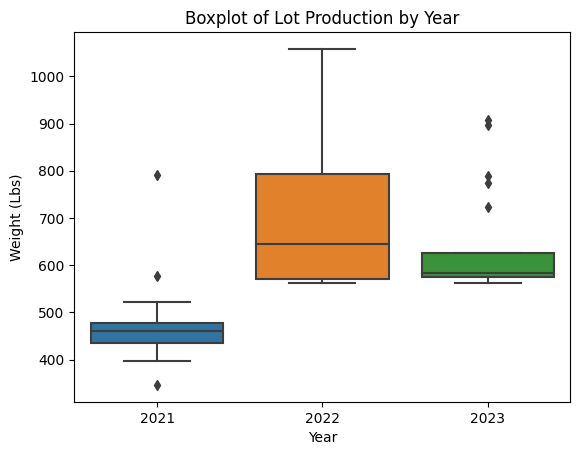

In [114]:
# Create a boxplot for the Production by year
print(sns.boxplot(x = 'Year', y = 'Weight (Lbs)', data = df_no_twin_rank).set_title('Boxplot of Lot Production by Year'))

# Calculate the basic statistical information
stats = df_no_twin_rank.groupby('Year')['Weight (Lbs)'].describe().round(2)
stats.drop(columns='count', inplace=True)

# Display the basic statistical information table
print(stats)

[Text(0, 0, '12196'), Text(0, 0, '15344.1'), Text(0, 0, '14012.3')]

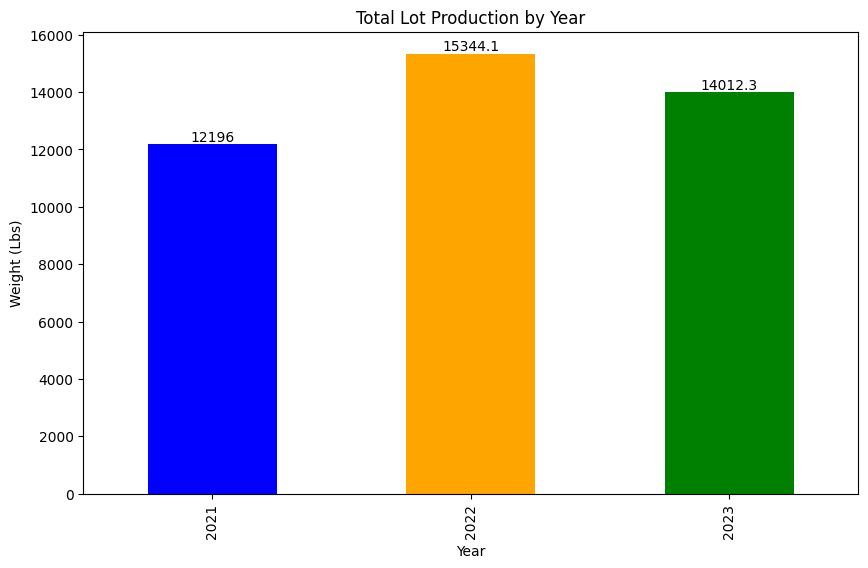

In [115]:
# Calculate the total lot production by year
total_production_per_year = df_no_twin_rank.groupby('Year')['Weight (Lbs)'].sum()

# Plot the data
ax = total_production_per_year.plot(kind='bar', xlabel='Year', ylabel='Weight (Lbs)',
                                figsize=(10,6), color=['blue', 'orange', 'green'], 
                                title="Total Lot Production by Year")

ax.bar_label(ax.containers[0])

[Text(0, 0, '469.076'), Text(0, 0, '697.461'), Text(0, 0, '636.924')]

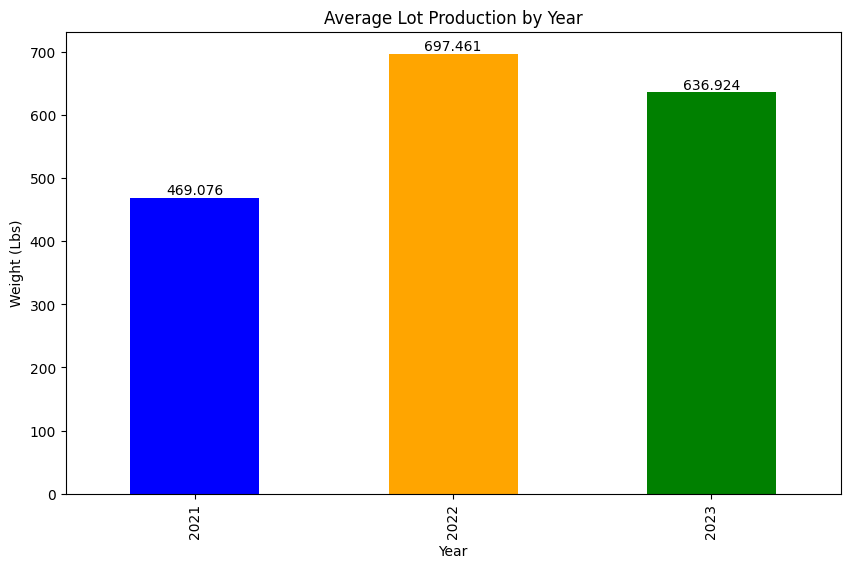

In [116]:
# Calculate the average coffee price by year
average_production_per_year = df_no_twin_rank.groupby('Year')['Weight (Lbs)'].mean()

# Plot the data
ax = average_production_per_year.plot(kind='bar', xlabel='Year', ylabel='Weight (Lbs)',
                                figsize=(10,6), color=['blue', 'orange', 'green'], 
                                title="Average Lot Production by Year")

ax.bar_label(ax.containers[0])

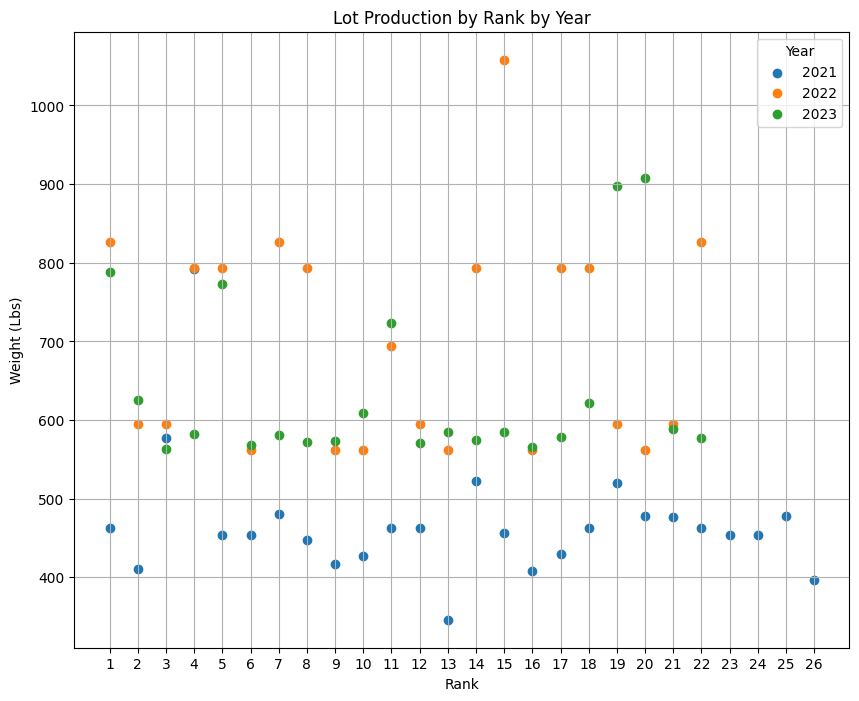

In [117]:
# Determine the range of ranks
rank_range = range(int(df['Converted Rank'].min()) -1, int(df['Converted Rank'].max()))

# Plot the data
plt.figure(figsize=(10,8))

# Scatter plot with different colors for different years
for year in df_no_twin_rank['Year'].unique():
    year_data = df_no_twin_rank[df_no_twin_rank['Year'] == year]
    plt.scatter(year_data['Converted Rank'], year_data['Weight (Lbs)'], label=year)

plt.xticks(rank_range)
plt.xlabel('Rank')
plt.ylabel('Weight (Lbs)')
plt.title('Lot Production by Rank by Year')
plt.legend(title='Year')
plt.grid(True)
plt.show()

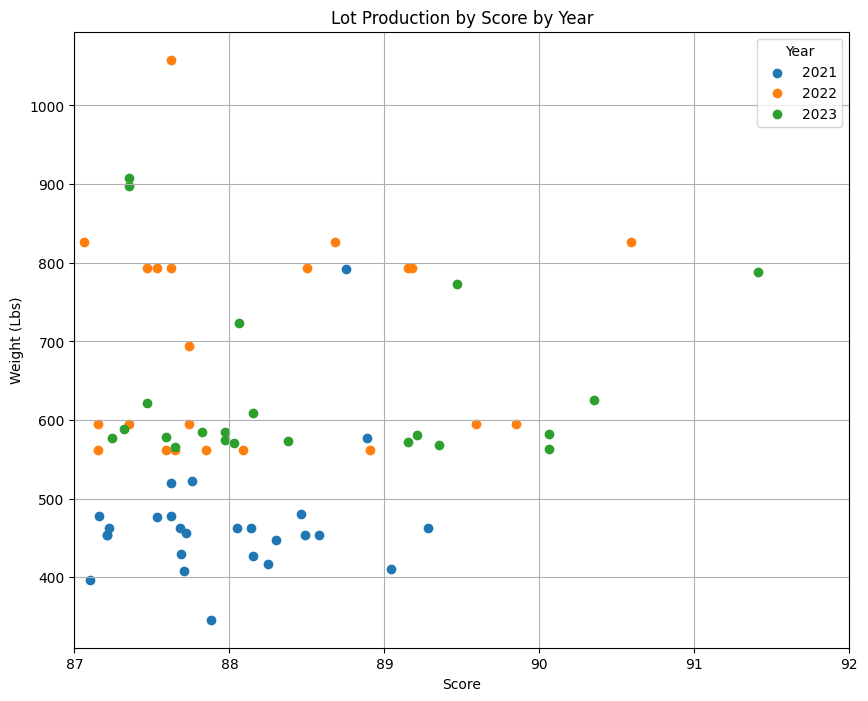

In [118]:
# Plot the data
plt.figure(figsize=(10, 8))

# Scatter plot with different colors for different years
for year in df_no_twin_rank['Year'].unique():
    year_data = df_no_twin_rank[df_no_twin_rank['Year'] == year]
    plt.scatter(year_data['Score'], year_data['Weight (Lbs)'], label=year)

# Set x-ticks to the COE standard
plt.xlim([87, 92])

plt.xlabel('Score')
plt.ylabel('Weight (Lbs)')
plt.title('Lot Production by Score by Year')
plt.legend(title='Year')
plt.grid(True)
plt.show()

                Frequency  Distribution (%)
Lot Production                             
<400 Lbs                2              2.86
400-600 Lbs            48             68.57
600-800 Lbs            14             20.00
>800 Lbs                6              8.57


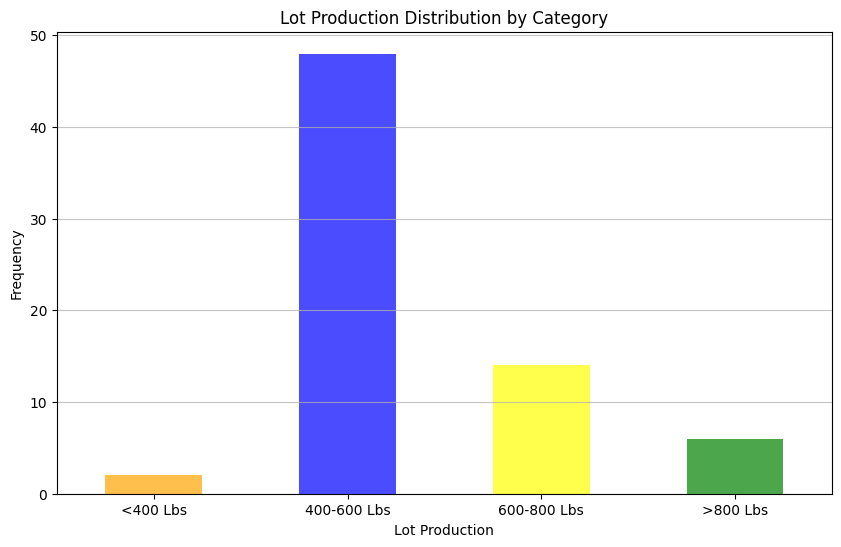

In [119]:
# Define the score categories
bins = [0, 399.99, 599.99, 800, float('inf')]
labels = ['<400 Lbs', '400-600 Lbs', '600-800 Lbs', '>800 Lbs']

# Categorize the values into the defined bins
df_no_twin_rank['Lot Production'] = pd.cut(df_no_twin_rank['Weight (Lbs)'], bins=bins, labels=labels, right=False)

# Count the number of values in each category
value_distribution = df_no_twin_rank['Lot Production'].value_counts().sort_index()

# Calculate the percentage distribution
total_values = value_distribution.sum()
percentage_distribution = (value_distribution / total_values) * 100

# Create a DataFrame to display the distribution and percentage
distribution_table = pd.DataFrame({
    'Frequency': value_distribution,
    'Distribution (%)': percentage_distribution.round(2)
})

# Present the distribution table
print(distribution_table)

# Plot the distribution using a bar graph
plt.figure(figsize=(10, 6))
value_distribution.plot(kind='bar', color=['orange', 'blue', 'yellow', 'green', ], alpha=0.7)
plt.xlabel('Lot Production')
plt.ylabel('Frequency')
plt.title('Lot Production Distribution by Category')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

## Coffee Price

The evaluation of the column "High Bid (US$)".

Text(0.5, 1.0, 'Boxplot of Price by Year')
       mean    std    min    25%    50%    75%    max
Year                                                 
2021  29.09  16.85  17.60  19.40  22.80  25.45  80.00
2022  15.85   7.16   9.00  10.75  13.80  19.96  40.20
2023  13.66   9.04   6.25   9.07  10.28  13.15  44.55


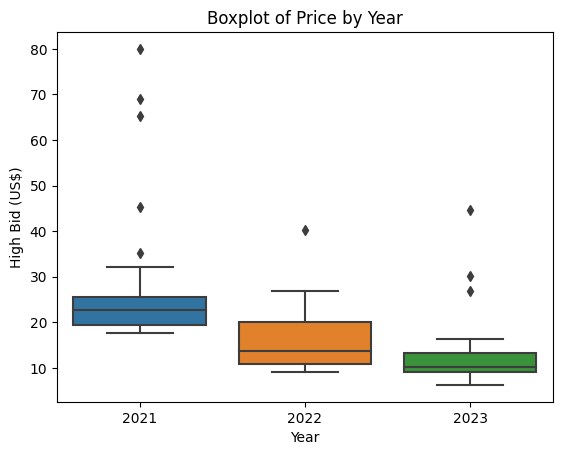

In [120]:
# Create a boxplot for the Price by year
print(sns.boxplot(x = 'Year', y = 'High Bid (US$)', data = df_no_twin_rank).set_title('Boxplot of Price by Year'))

# Calculate the basic statistical information
stats = df_no_twin_rank.groupby('Year')['High Bid (US$)'].describe().round(2)
stats.drop(columns='count', inplace=True)

# Display the basic statistical information table
print(stats)

[Text(0, 0, '29.09'), Text(0, 0, '15.85'), Text(0, 0, '13.66')]

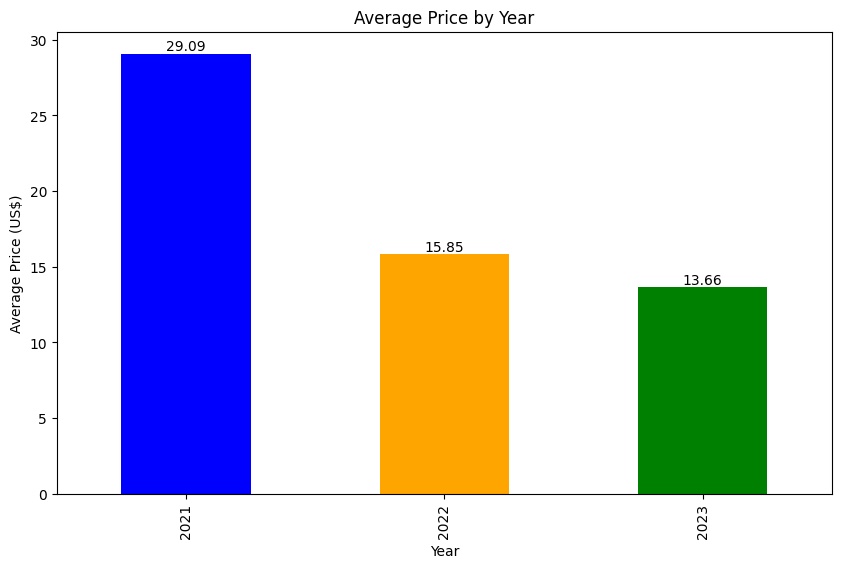

In [121]:
# Calculate the average coffee price by year
average_prices_per_year = df_no_twin_rank.groupby('Year')['High Bid (US$)'].mean().round(2)

# Plot the data
ax = average_prices_per_year.plot(kind='bar', xlabel='Year', ylabel='Average Price (US$)',
                                figsize=(10,6), color=['blue', 'orange', 'green'], 
                                title="Average Price by Year")

ax.bar_label(ax.containers[0])

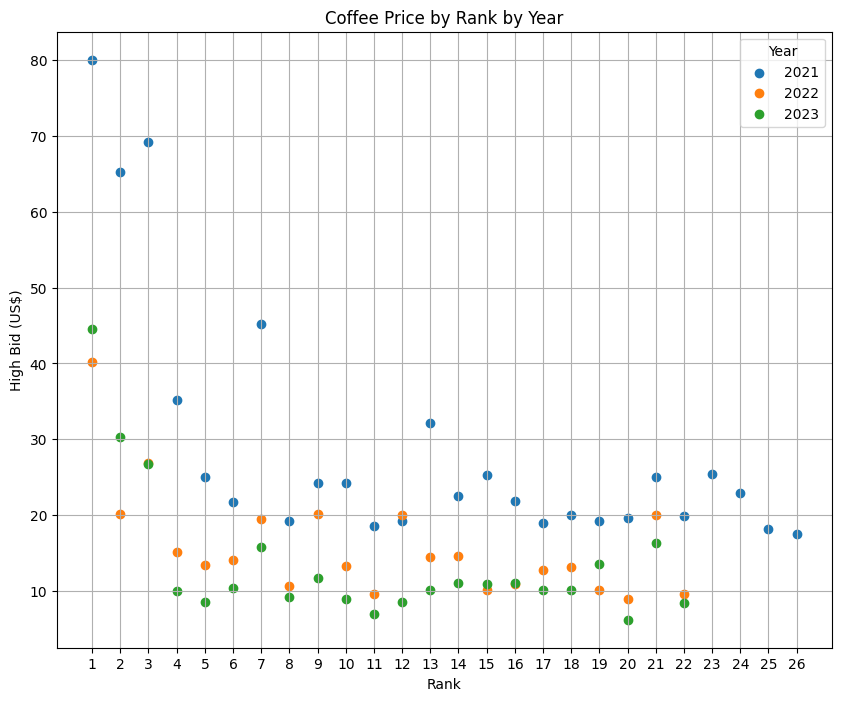

In [122]:
# Determine the range of ranks
rank_range = range(int(df['Converted Rank'].min()) -1, int(df['Converted Rank'].max()))

# Plot the data
plt.figure(figsize=(10, 8))

# Scatter plot with different colors for different years
for year in df_no_twin_rank['Year'].unique():
    year_data = df_no_twin_rank[df_no_twin_rank['Year'] == year]
    plt.scatter(year_data['Converted Rank'], year_data['High Bid (US$)'], label=year)

plt.xticks(rank_range)
plt.xlabel('Rank')
plt.ylabel('High Bid (US$)')
plt.title('Coffee Price by Rank by Year')
plt.legend(title='Year')
plt.grid(True)
plt.show()

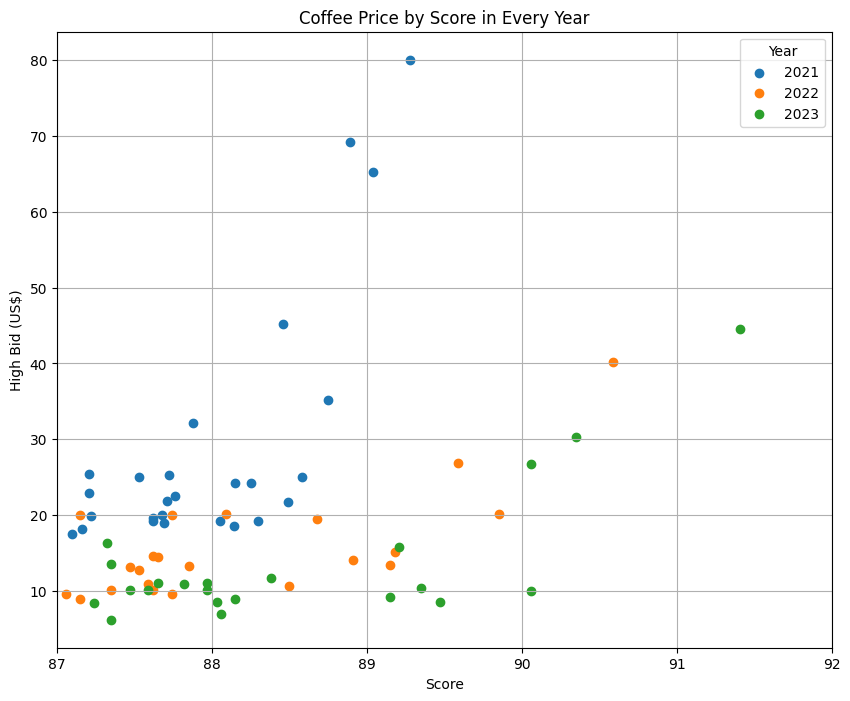

In [123]:
# Plot the data
plt.figure(figsize=(10, 8))

# Scatter plot with different colors for different years
for year in df_no_twin_rank['Year'].unique():
    year_data = df_no_twin_rank[df_no_twin_rank['Year'] == year]
    plt.scatter(year_data['Score'], year_data['High Bid (US$)'], label=year)

# Set x-ticks to show every rank
plt.xlim([87, 92])

plt.xlabel('Score')
plt.ylabel('High Bid (US$)')
plt.title('Coffee Price by Score in Every Year')
plt.legend(title='Year')
plt.grid(True)
plt.show()

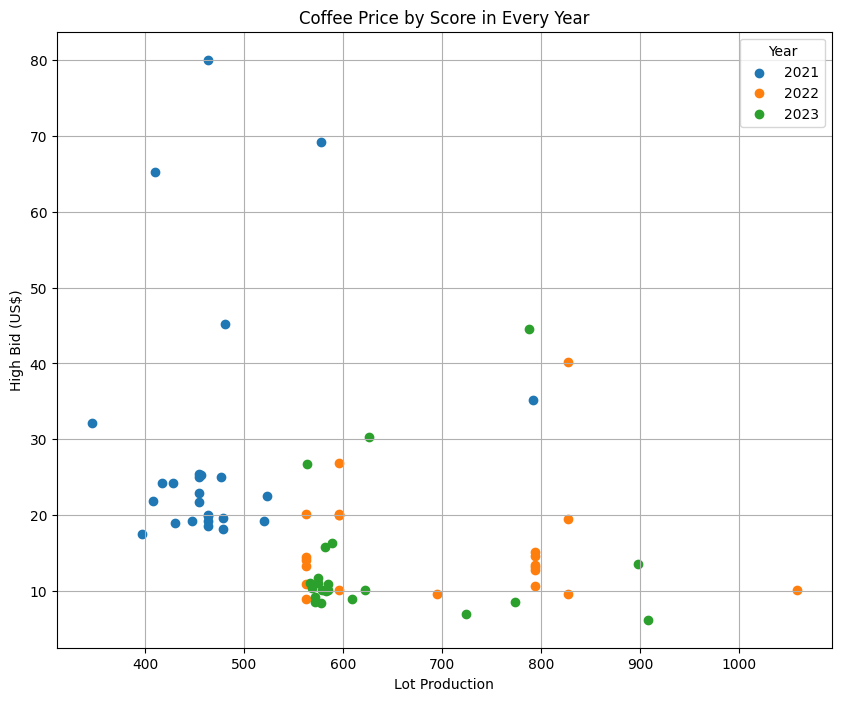

In [124]:
# Plot the data
plt.figure(figsize=(10, 8))

# Scatter plot with different colors for different years
for year in df_no_twin_rank['Year'].unique():
    year_data = df_no_twin_rank[df_no_twin_rank['Year'] == year]
    plt.scatter(year_data['Weight (Lbs)'], year_data['High Bid (US$)'], label=year)

plt.xlabel('Lot Production')
plt.ylabel('High Bid (US$)')
plt.title('Coffee Price by Score in Every Year')
plt.legend(title='Year')
plt.grid(True)
plt.show()

           Frequency  Distribution (%)
Price                                 
<10 US$           10             14.29
10-30 US$         51             72.86
30-50 US$          6              8.57
>50 US$            3              4.29


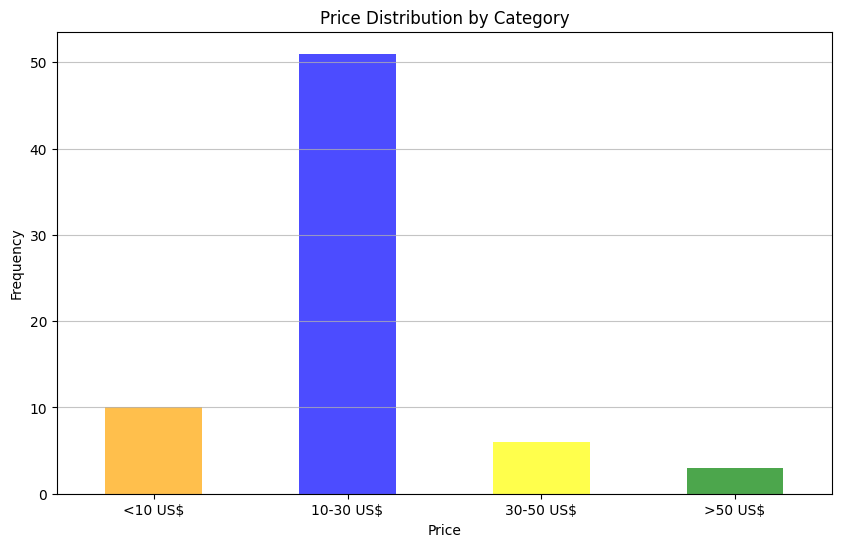

In [125]:
# Define the score categories
bins = [0, 9.99, 29.99, 49.99, float('inf')]
labels = ['<10 US$', '10-30 US$', '30-50 US$', '>50 US$']

# Categorize the values into the defined bins
df_no_twin_rank['Price'] = pd.cut(df_no_twin_rank['High Bid (US$)'], bins=bins, labels=labels, right=False)

# Count the number of values in each category
value_distribution = df_no_twin_rank['Price'].value_counts().sort_index()

# Calculate the percentage distribution
total_values = value_distribution.sum()
percentage_distribution = (value_distribution / total_values) * 100

# Create a DataFrame to display the distribution and percentage
distribution_table = pd.DataFrame({
    'Frequency': value_distribution,
    'Distribution (%)': percentage_distribution.round(2)
})

# Present the distribution table
print(distribution_table)

# Plot the distribution using a bar graph
plt.figure(figsize=(10, 6))
value_distribution.plot(kind='bar', color=['orange', 'blue', 'yellow', 'green', ], alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution by Category')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

## Lot Value

The evaluation of the column "Total Value (US$)".

Text(0.5, 1.0, 'Boxplot of Lot Value by Year')
          mean      std      min      25%       50%       75%       max
Year                                                                   
2021  13859.27  8971.95  6984.21  9004.76  10237.71  11751.58  39912.85
2022  11018.61  5769.56  5059.62  7949.88  10582.06  11964.52  33234.55
2023   8810.92  6867.61  4878.95  5713.91   6311.70   8580.13  35111.65


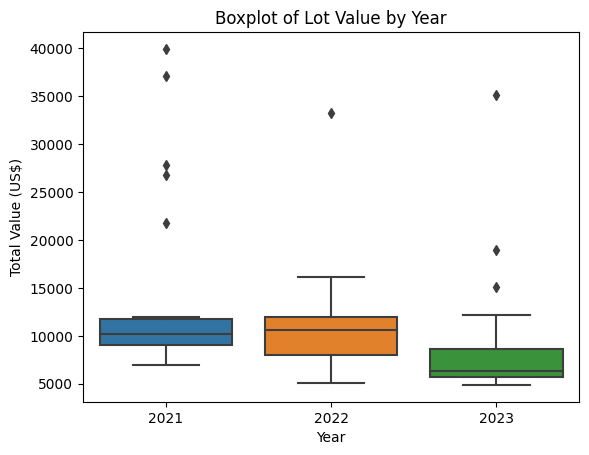

In [126]:
# Create a boxplot for the lot value by year
print(sns.boxplot(x = 'Year', y = 'Total Value (US$)', data = df_no_twin_rank).set_title('Boxplot of Lot Value by Year'))

# Calculate the basic statistical information
stats = df_no_twin_rank.groupby('Year')['Total Value (US$)'].describe().round(2)
stats.drop(columns='count', inplace=True)

# Display the basic statistical information table
print(stats)

[Text(0, 0, '360341'), Text(0, 0, '242409'), Text(0, 0, '193840')]

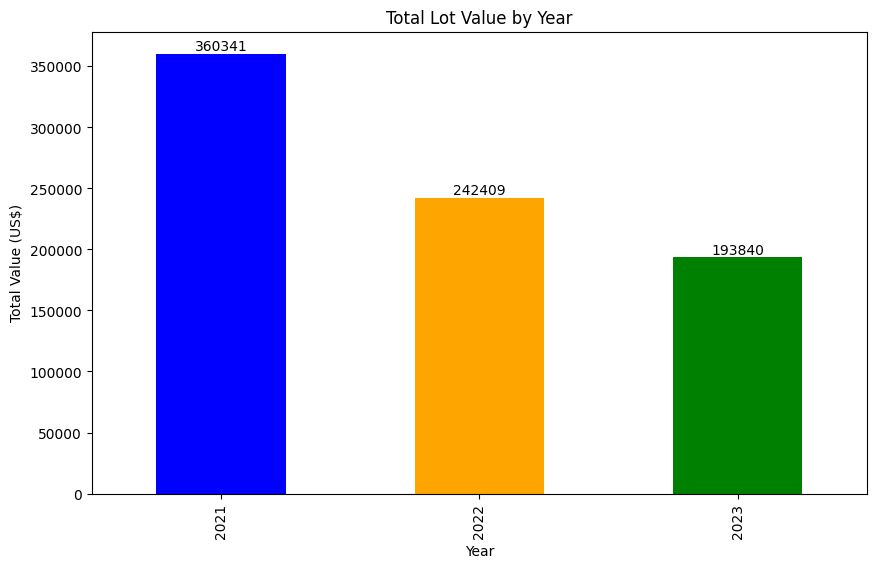

In [127]:
# Calculate the average lot value by year
average_value_per_year = df_no_twin_rank.groupby('Year')['Total Value (US$)'].sum()

# Plot the data
ax = average_value_per_year.plot(kind='bar', xlabel='Year', ylabel='Total Value (US$)',
                                figsize=(10,6), color=['blue', 'orange', 'green'], 
                                title="Total Lot Value by Year")

ax.bar_label(ax.containers[0])

[Text(0, 0, '13859.3'), Text(0, 0, '11018.6'), Text(0, 0, '8810.92')]

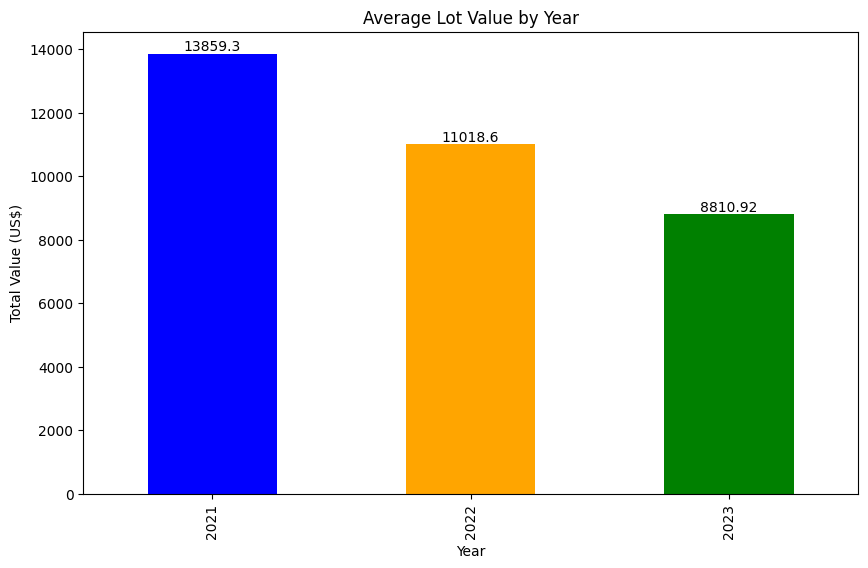

In [128]:
# Calculate the average lot value by year
average_value_per_year = df_no_twin_rank.groupby('Year')['Total Value (US$)'].mean()

# Plot the data
ax = average_value_per_year.plot(kind='bar', xlabel='Year', ylabel='Total Value (US$)',
                                figsize=(10,6), color=['blue', 'orange', 'green'], 
                                title="Average Lot Value by Year")

ax.bar_label(ax.containers[0])

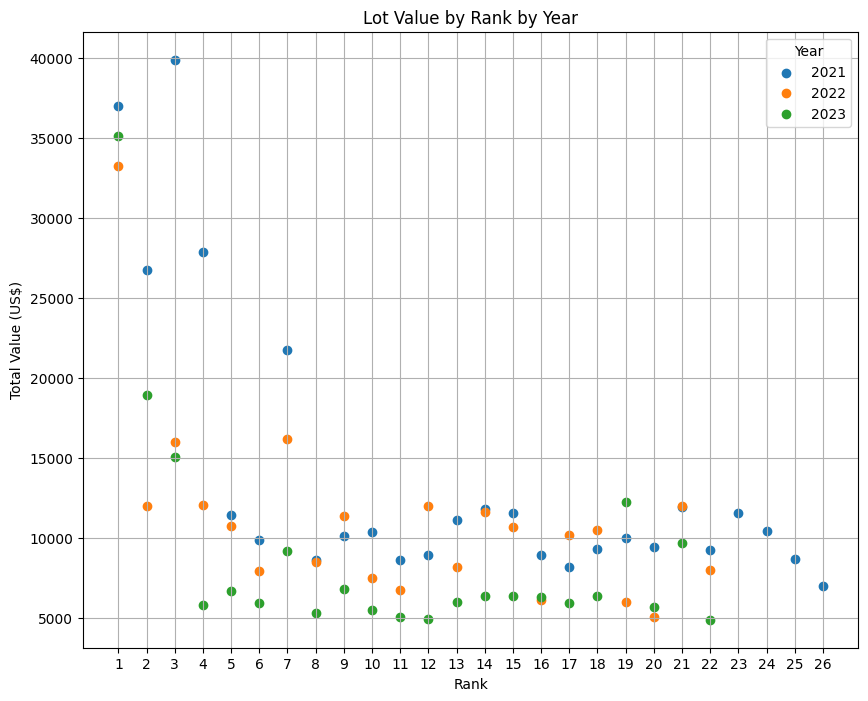

In [129]:
# Determine the range of ranks
rank_range = range(int(df['Converted Rank'].min()) -1, int(df['Converted Rank'].max()))

# Plot the data
plt.figure(figsize=(10, 8))

# Scatter plot with different colors for different years
for year in df_no_twin_rank['Year'].unique():
    year_data = df_no_twin_rank[df_no_twin_rank['Year'] == year]
    plt.scatter(year_data['Converted Rank'], year_data['Total Value (US$)'], label=year)

plt.xticks(rank_range)
plt.xlabel('Rank')
plt.ylabel('Total Value (US$)')
plt.title('Lot Value by Rank by Year')
plt.legend(title='Year')
plt.grid(True)
plt.show()

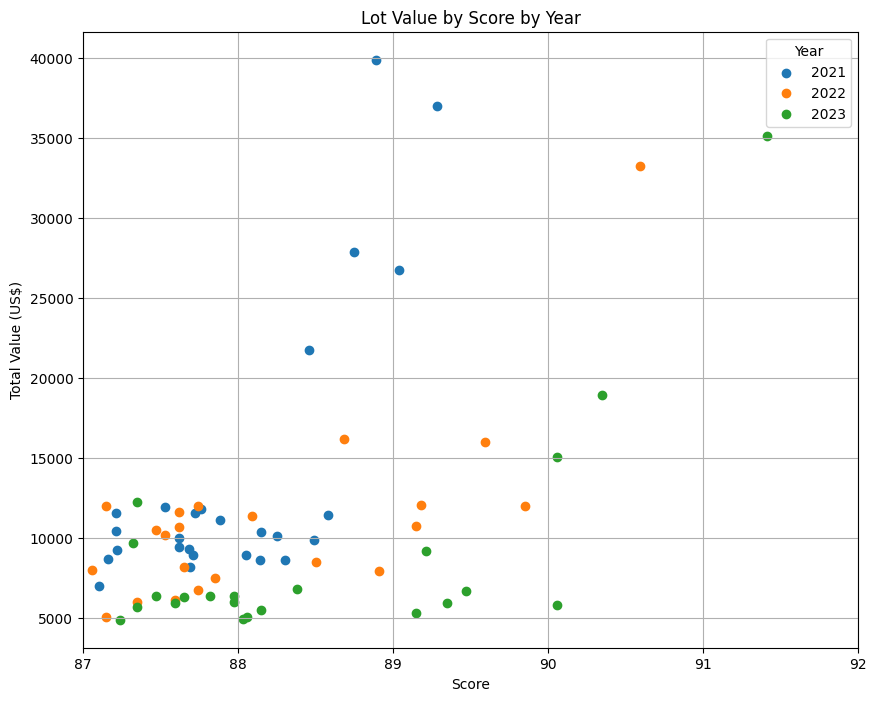

In [130]:
# Plot the data
plt.figure(figsize=(10, 8))

# Scatter plot with different colors for different years
for year in df_no_twin_rank['Year'].unique():
    year_data = df_no_twin_rank[df_no_twin_rank['Year'] == year]
    plt.scatter(year_data['Score'], year_data['Total Value (US$)'], label=year)

# Set x-ticks to the COE standard
plt.xlim([87, 92])

plt.xlabel('Score')
plt.ylabel('Total Value (US$)')
plt.title('Lot Value by Score by Year')
plt.legend(title='Year')
plt.grid(True)
plt.show()

                   Frequency  Distribution (%)
Lot Value                                     
<5000 US$                  2              2.86
5000 - 10000 US$          37             52.86
10000 - 15000 US$         20             28.57
>15000 US$                11             15.71


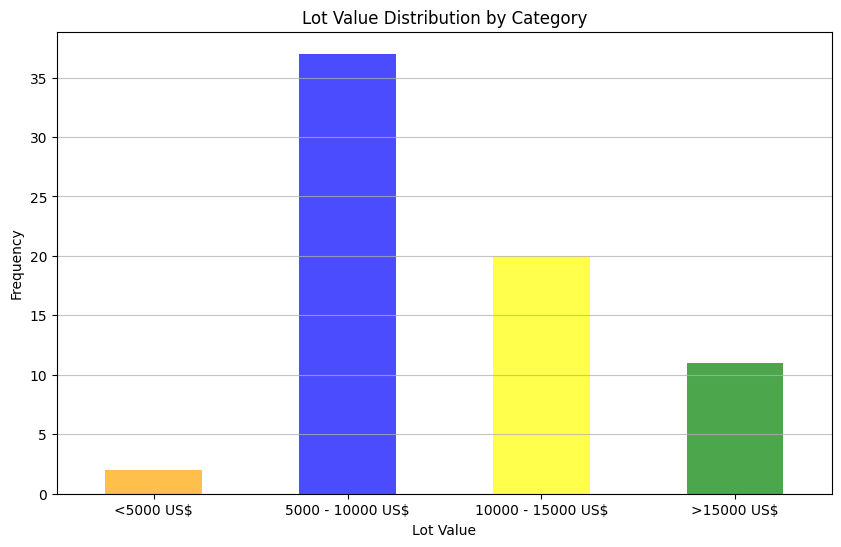

In [131]:
# Define the value categories
bins = [0, 4999.99, 9999.99, 14999.99, float('inf')]
labels = ['<5000 US$', '5000 - 10000 US$', '10000 - 15000 US$', '>15000 US$']

# Categorize the values into the defined bins
df_no_twin_rank['Lot Value'] = pd.cut(df_no_twin_rank['Total Value (US$)'], bins=bins, labels=labels, right=False)

# Count the number of values in each category
value_distribution = df_no_twin_rank['Lot Value'].value_counts().sort_index()

# Calculate the percentage distribution
total_values = value_distribution.sum()
percentage_distribution = (value_distribution / total_values) * 100

# Create a DataFrame to display the distribution and percentage
distribution_table = pd.DataFrame({
    'Frequency': value_distribution,
    'Distribution (%)': percentage_distribution.round(2)
})

# Present the distribution table
print(distribution_table)

# Plot the distribution using a bar graph
plt.figure(figsize=(10, 6))
value_distribution.plot(kind='bar', color=['orange', 'blue', 'yellow', 'green', ], alpha=0.7)
plt.xlabel('Lot Value')
plt.ylabel('Frequency')
plt.title('Lot Value Distribution by Category')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()


## Correlation

In [135]:
corr = df_no_twin_rank.corr(numeric_only=True).round(3)
corr.style.background_gradient(cmap='coolwarm')

,Score,Weight (Lbs),High Bid (US$),Total Value (US$)
Score,1.000000,0.157000,0.396000,0.534000
Weight (Lbs),0.157000,1.000000,-0.269000,0.091000
High Bid (US$),0.396000,-0.269000,1.000000,0.906000
Total Value (US$),0.534000,0.091000,0.906000,1.000000


There is a very strong correlation only between the coffee price and the coffee lot value. While lot production has a mildly strong correlation with the total value.

Given that there is a weak correlation between the coffee score and price, it may be assumed that buyers do not consider the score when submitting offers for the coffees they like.

Another notable correlation is between lot production and price; they have a weak negative correlation, which means that the more productive a coffee lot, the price tends to be cheaper, in a weak or unreliable manner.

## Conclusion

As seen in the graphs that evaluated each numerical columns, and concluded by the correlation chart, there are no significant correlation among the numerical columns in the dataset.

According to general assumptions, the higher the coffee score, the higher the price. In reality 